# Ficha 4
### Trabalho Realizado por:
- Duarte Castanheira   nº111211
- Rafael Custódio     nº111112

## Bibliotecas Importadas

In [105]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

## Exercicio 1

Parâmetros definidos

In [106]:
# Definir dimensões da sala
ROWS = 10
COLS = 10

# Mapear ações para deslocamentos (linha, coluna)
actions_list = ["up", "down", "right", "left"]

SEED = 10
random.seed(SEED)


#### Ponto a)
 função de transição de estado, onde um estado (state) e uma ação (action) são dados como argumento, e um novo estado é devolvido, de modo que: f(1, right) = 2, f(1, down) = 11, f(1, up) = 1, f(1, left) = 1

In [107]:
def state_to_coords(state):
    """Converte o estado (1-100) em coordenadas (linha, coluna)"""
    row = (state - 1) // COLS
    col = (state - 1) % COLS
    return row, col

def coords_to_state(row, col):
    """Converte coordenadas (linha, coluna) de volta para estado (1-100)"""
    return row * COLS + col + 1

def transition(state, action):
    deltas = {"up": (-1, 0), "down": (1, 0), "right": (0, 1), "left": (0, -1)}
    row, col = state_to_coords(state)
    delta_row, delta_col = deltas[action]
    new_row, new_col = row + delta_row, col + delta_col
    if 0 <= new_row < ROWS and 0 <= new_col < COLS:
        return coords_to_state(new_row, new_col)
    else:
        return state
    

# Exemplos de teste
print(transition(1, "right"))  # Deve dar 2
print(transition(1, "down"))   # Deve dar 11
print(transition(1, "up"))     # Deve dar 1 (parede)
print(transition(1,"left"))

2
11
1
1


#### Ponto b)
Uma função de recompensa r(s) que recompensa todos os estados com 0 e o estado objetivo (estado 100) com 100 pontos

In [108]:
def reward(state):
    """Função de recompensa r(s)"""
    #se chegou ao objetivo
    if state == 100:
        return 100
    #se não chegou ao objetivo
    else:
        return 0

# Testes
print(reward(1))    # Deve dar 0
print(reward(100))  # Deve dar 100
print(reward(50))   # Deve dar 0

0
100
0


#### Ponto c)
 Uma função que escolhe uma ação aleatoriamente

In [109]:
def choose_random_action():
    """Escolhe uma ação aleatoriamente entre cima, baixo, esquerda e direita"""
    return random.choice(actions_list)

# Testes
for _ in range(5):
    print(choose_random_action())

up
left
left
up
down


#### Ponto d)
 Defina o fim do episódio – quando o robot atingir o estado objetivo (a tomada elétrica, marcada com um X, estado 100), este deve ser re-colocado na posição inicial após receber a recompensa. Quando o robot executar 1000 ações sem atingir o objetivo, este deve ser re-colocado à posição inicial sem recompensa.

In [110]:
MAX_STEPS = 1000
#random.seed(SEED)

# Função de simulação de episódio
def run_episode():
    state = 1
    total_reward = 0

    for step in range(MAX_STEPS):
        action = choose_random_action()     # escolhe ação aleatoria
        state = transition(state, action)   # move o robot
        r = reward(state)                   # calcula o reward
        total_reward += r

        if state == 100:
            #print(f"Objetivo atingido em {step+1} passos! Recompensa: {r}")
            return step+1, total_reward  # passos e recompensa total
    
    #print(f"Não atingiu o objetivo após {MAX_STEPS} ações. Reposição à posição inicial.")
    return MAX_STEPS, total_reward  # não atingiu o objetivo

# Teste
s, r = run_episode()
print(f"Recompensa total do episódio: {r}, após {s} passos")

Recompensa total do episódio: 0, após 1000 passos


#### Ponto e)
Simule o robot a realizar um episódio e repita-o 30 vezes. Meça e registe a recompensa média por passo em cada episódio e o número de passos para atingir o objetivo em cada episódio. Calcule a média e o desvio padrão do número de passos para atingir o objetivo, tempos de execução e recompensas para os 30 testes. Estes serão os resultados de referência e serão usados para testar se o sistema está a ter um desempenho melhor do que apenas adivinhar aleatoriamente.


In [111]:
# Simulação de 30 episódios
EPISODES = 30

# para guardar os resultados finais
steps_list = []
reward_per_step_list = []
execution_times = []

random.seed(SEED)

for ep in range(EPISODES):
    start_time = time.time()
    steps, total_reward = run_episode()
    end_time = time.time()

    #guarda os resultados finais
    steps_list.append(steps)
    reward_per_step_list.append(total_reward / steps)
    execution_times.append(end_time - start_time)

# Estatísticas
mean_steps = np.mean(steps_list)
std_steps = np.std(steps_list)
mean_reward = np.mean(reward_per_step_list)
std_reward = np.std(reward_per_step_list)
mean_time = np.mean(execution_times)
std_time = np.std(execution_times)

# Resultados
print("Resultados dos 30 episódios (aleatório):\n")
for i in range(EPISODES):
    print(f"Episódio {i+1}: passos = {steps_list[i]}, recompensa média por passo = {reward_per_step_list[i]:.4f}")

print("\nEstatísticas gerais:")
print(f"Média de passos: {mean_steps:.2f}, Desvio padrão: {std_steps:.2f}")
print(f"Média de recompensa por passo: {mean_reward:.4f}, Desvio padrão: {std_reward:.4f}")
print(f"Média de tempo de execução: {mean_time:.4f}s, Desvio padrão: {std_time:.4f}s")

Resultados dos 30 episódios (aleatório):

Episódio 1: passos = 1000, recompensa média por passo = 0.0000
Episódio 2: passos = 1000, recompensa média por passo = 0.0000
Episódio 3: passos = 774, recompensa média por passo = 0.1292
Episódio 4: passos = 884, recompensa média por passo = 0.1131
Episódio 5: passos = 590, recompensa média por passo = 0.1695
Episódio 6: passos = 370, recompensa média por passo = 0.2703
Episódio 7: passos = 138, recompensa média por passo = 0.7246
Episódio 8: passos = 477, recompensa média por passo = 0.2096
Episódio 9: passos = 380, recompensa média por passo = 0.2632
Episódio 10: passos = 137, recompensa média por passo = 0.7299
Episódio 11: passos = 172, recompensa média por passo = 0.5814
Episódio 12: passos = 324, recompensa média por passo = 0.3086
Episódio 13: passos = 1000, recompensa média por passo = 0.0000
Episódio 14: passos = 286, recompensa média por passo = 0.3497
Episódio 15: passos = 854, recompensa média por passo = 0.1171
Episódio 16: passos

#### Ponto f)
Represente a média e o desvio padrão (recompensa, passos para atingir o objetivo e tempos de execução), cada um num boxplot diferente com caixas verticais

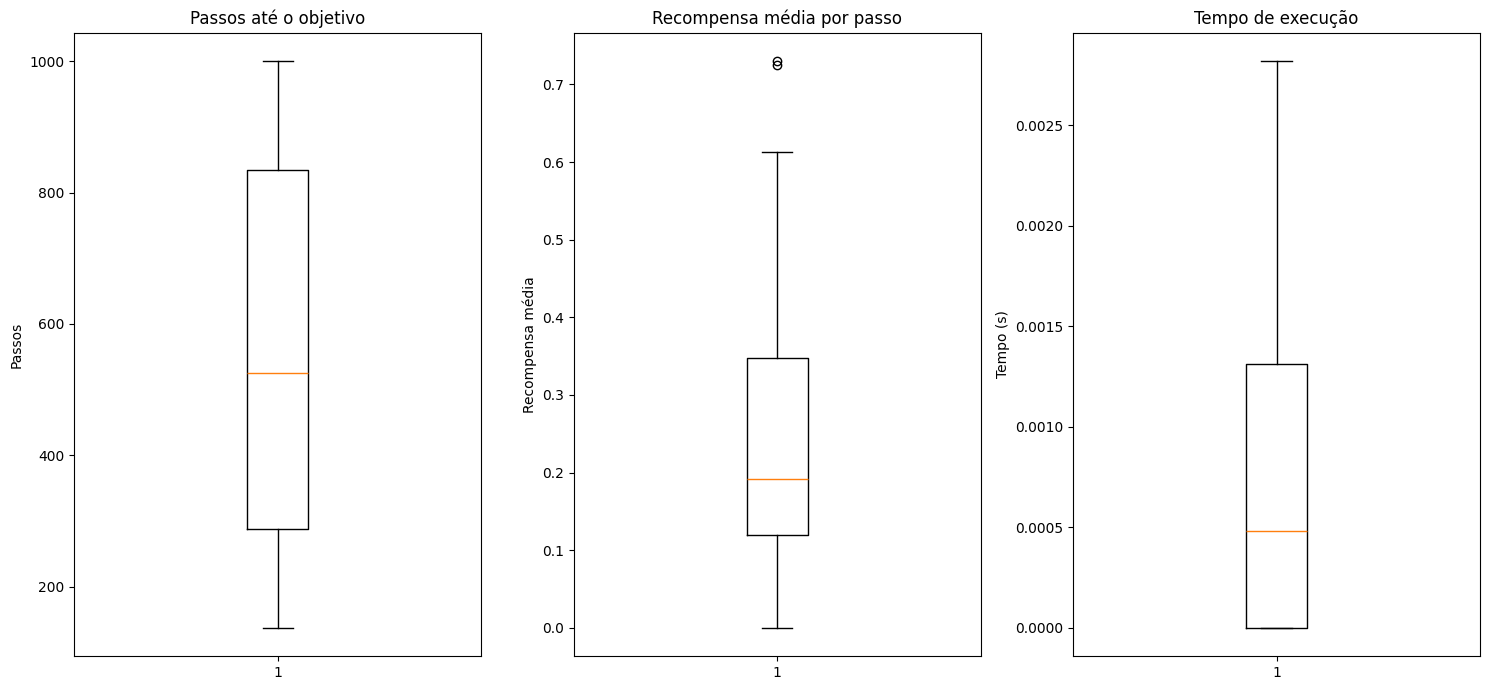

In [112]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7))  # 1 linha, 3 colunas

# Boxplot 1: Número de passos
axes[0].boxplot(steps_list, vert=True)
axes[0].set_title("Passos até o objetivo")
axes[0].set_ylabel("Passos")

# Boxplot 2: Recompensa média por passo
axes[1].boxplot(reward_per_step_list, vert=True)
axes[1].set_title("Recompensa média por passo")
axes[1].set_ylabel("Recompensa média")

# Boxplot 3: Tempo de execução
axes[2].boxplot(execution_times, vert=True)
axes[2].set_title("Tempo de execução")
axes[2].set_ylabel("Tempo (s)")

plt.tight_layout()
plt.show()

## Exercicio 2
Neste exercicio serão aplicados o algoritmo Random Walk e o algoritmo de reforço Q-learning

In [113]:
NUM_STATES = 100
NUM_ACTIONS = len(actions_list)

#matriz Q inicializada a 0's
Q = np.zeros((NUM_STATES + 1, NUM_ACTIONS))  # +1 porque os estados vão de 1 a 100

alpha = 0.7    # taxa de aprendizagem
gamma = 0.99   # fator de desconto

#função para atualizar a matriz Q
def update_Q(state, action_index, next_state, Q, alpha, gamma):
    r = reward(next_state)  # função de recompensa que definimos antes
    best_next_Q = np.max(Q[next_state, :])  # max Q[s', a'] sobre todas as ações
    Q[state, action_index] = (1 - alpha) * Q[state, action_index] + \
                              alpha * (r + gamma * best_next_Q)

#funcao para escolher a melhor ação com base na matriz Q
def best_action(state, Q):
    action_index = np.argmax(Q[state, :])
    return actions_list[action_index]
    


#### Ponto a)
 Faça uma caminhada aleatória (random walk) e execute esta função de atualização após cada transição de estado para 20000 passos em cada experiência. Repita a experiência 30 vezes. Em cada uma das 30 experiências, aos passos 100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500 e 20000, pare para executar um teste.

Média do tempo de execução: 0.17s, Desvio padrão: 0.03s


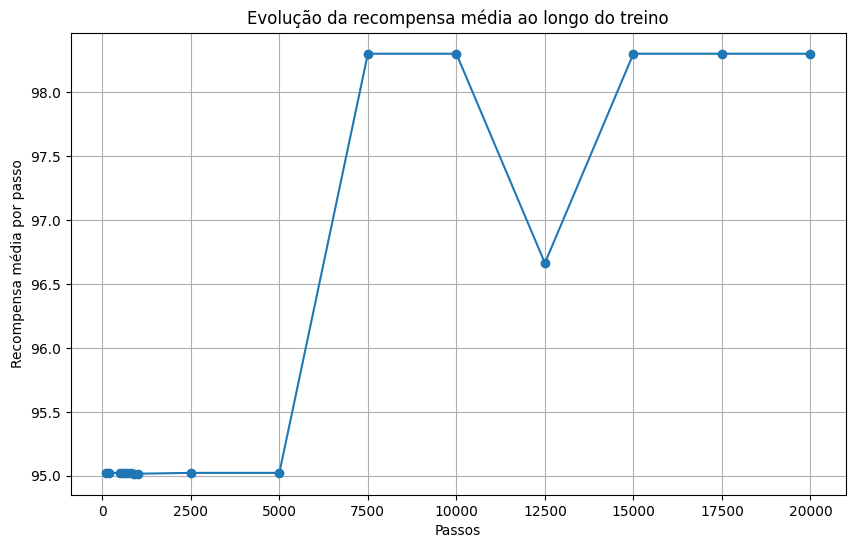

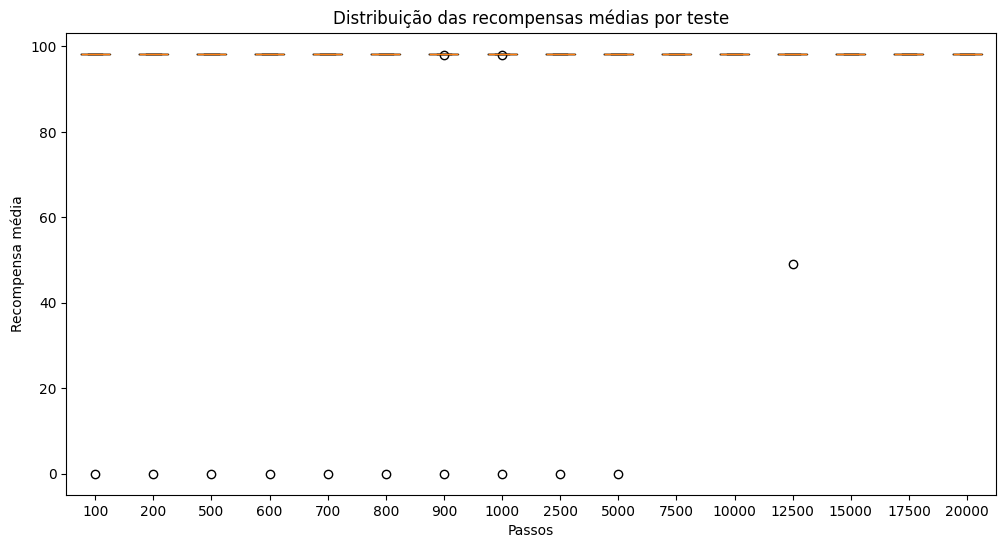

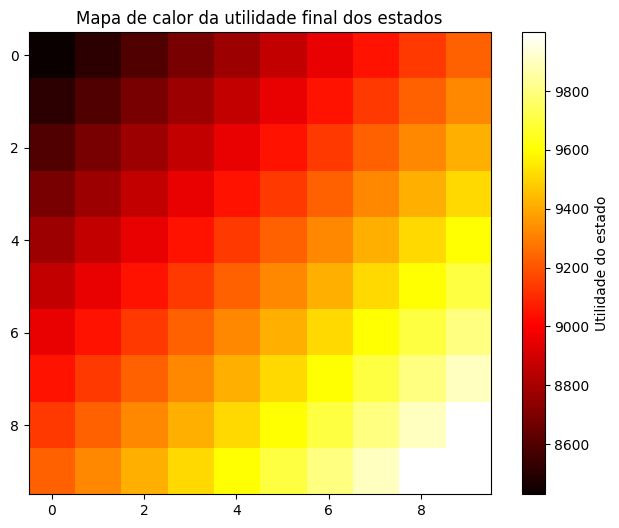

In [114]:
#matriz Q inicializada a 0's
Q = np.zeros((NUM_STATES + 1, NUM_ACTIONS))  # +1 porque os estados vão de 1 a 100

alpha = 0.7    # taxa de aprendizagem
gamma = 0.99   # fator de desconto

# Pontos onde vamos testar a recompensa média
test_steps = [100, 200, 500, 600, 700, 800, 900, 1000,
              2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]

all_rewards = {step: [] for step in test_steps}
all_times = []

def run_test_randomWalk(Q, steps=MAX_STEPS):
    """Executa 1000 passos com a política atual e devolve a recompensa média por passo"""
    state = 1  # estado inicial 
    total_reward = 0
    for _ in range(steps):
        action = best_action(state, Q) 
        next_state = transition(state, action)
        total_reward += reward(next_state)
        state = next_state
    return total_reward / steps


random.seed(SEED)

for exp in range(EPISODES):
    
    state = 1  # estado inicial 
    start_time = time.time()
    
    for step in range(1,20001):
        action_index = random.randint(0, NUM_ACTIONS-1)  # escolha aleatória
        action = actions_list[action_index]
        next_state = transition(state, action)
        
        # Atualiza Q
        update_Q(state, action_index, next_state, Q, alpha, gamma)
        
        state = next_state
        
        # Testes nos passos definidos
        if step in test_steps:
            avg_reward = run_test_randomWalk(Q, steps=1000)
            all_rewards[step].append(avg_reward)
            state_values = np.max(Q[1:, :], axis=1).reshape((10,10))
    
    elapsed_time = time.time() - start_time
    all_times.append(elapsed_time)

# Calcula média e desvio padrão dos tempos
mean_time = np.mean(all_times)
std_time = np.std(all_times)
print(f"Média do tempo de execução: {mean_time:.2f}s, Desvio padrão: {std_time:.2f}s")

# Gráfico de recompensa média vs passos
avg_rewards_over_exp = [np.mean(all_rewards[step]) for step in test_steps]

plt.figure(figsize=(10,6))
plt.plot(test_steps, avg_rewards_over_exp, marker='o')
plt.xlabel("Passos")
plt.ylabel("Recompensa média por passo")
plt.title("Evolução da recompensa média ao longo do treino")
plt.grid(True)
plt.show()

# Diagramas de caixa
plt.figure(figsize=(12,6))
plt.boxplot([all_rewards[step] for step in test_steps], tick_labels=test_steps)
plt.xlabel("Passos")
plt.ylabel("Recompensa média")
plt.title("Distribuição das recompensas médias por teste")
plt.show()

# Mapa de calor da utilidade final dos estados
plt.figure(figsize=(8,6))
# Sendo o ambiente é uma grelha 10x10
state_values = np.max(Q[1:, :], axis=1).reshape((10,10))
plt.imshow(state_values, cmap='hot', interpolation='nearest')
plt.colorbar(label="Utilidade do estado")
plt.title("Mapa de calor da utilidade final dos estados")
plt.show()

Com este mapa de calor podemos concluir que o Random Walk tem uma exploração muito completa, explorando todos os estados possiveis.

#### Ponto b)
Faça o mesmo teste do exemplo anterior, mas em vez de uma caminhada aleatória, use sempre os valores da tabela Q para escolher a melhor ação. Tenha cuidado para fazer os desempates aleatoriamente

Média do tempo de execução: 0.46s, Desvio padrão: 0.08s


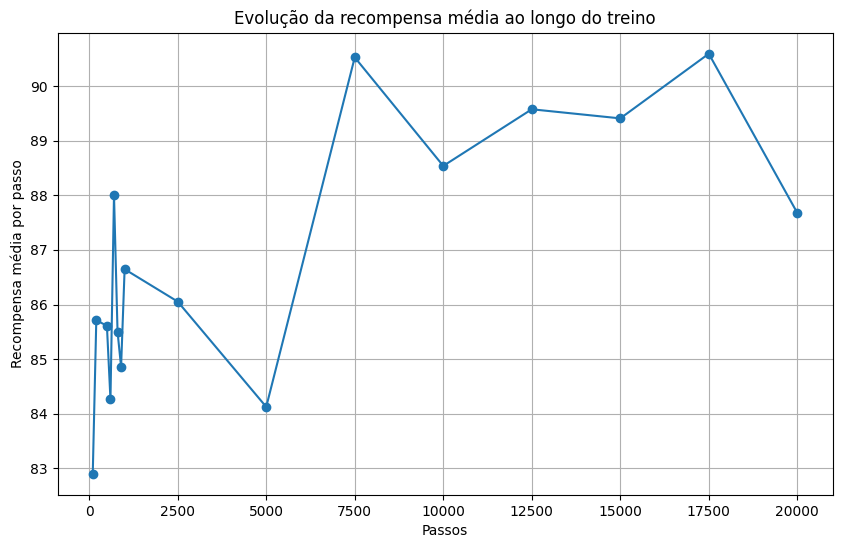

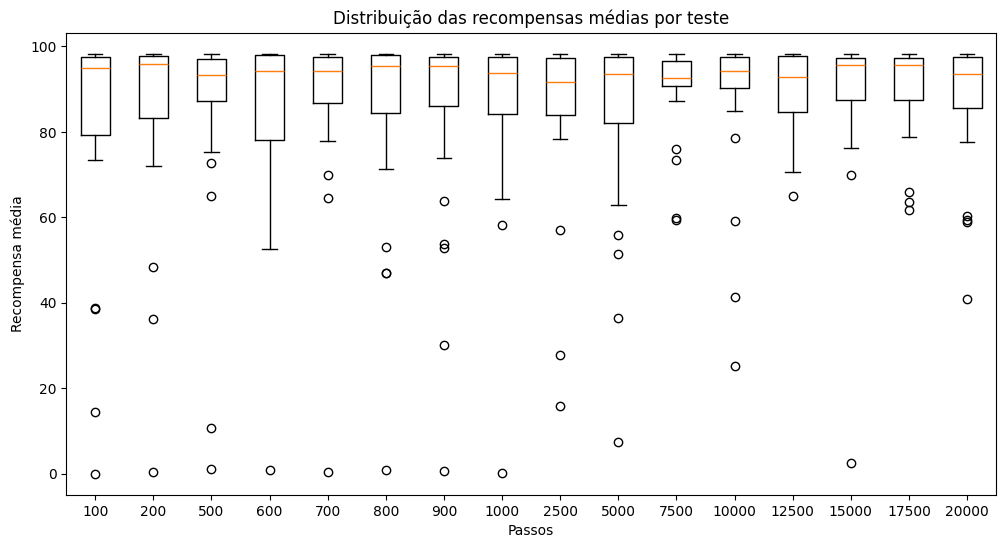

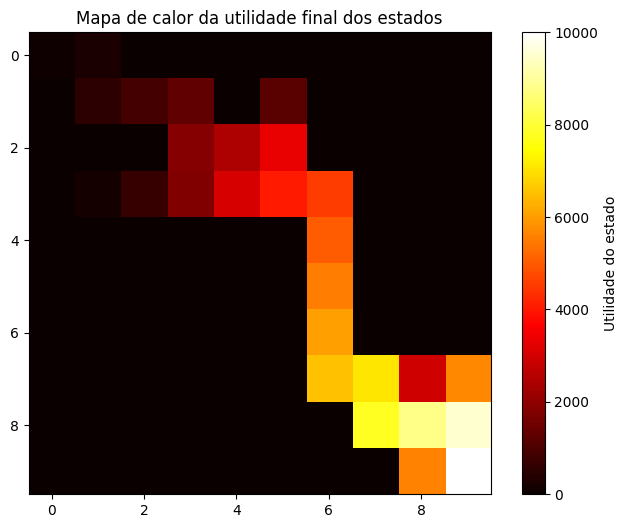

In [115]:
#matriz Q inicializada a 0's
Q = np.zeros((NUM_STATES + 1, NUM_ACTIONS))  # +1 porque os estados vão de 1 a 100

alpha = 0.7    # taxa de aprendizagem
gamma = 0.99   # fator de desconto

# Pontos onde vamos testar a recompensa média
test_steps = [100, 200, 500, 600, 700, 800, 900, 1000,
              2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]

all_rewards = {step: [] for step in test_steps}
all_times = []

# escolhe a melhor ação com base na matriz Q
def best_action_random_tie(state, Q):
    """Escolhe a melhor ação segundo Q, com desempate aleatório."""
    q_vals = Q[state]
    max_val = np.max(q_vals)
    best_actions = np.flatnonzero(q_vals == max_val)
    return random.choice(best_actions)  #se existir empate escolhe aleatoriamente 


def run_test_best(Q, steps):
    """Executa 1000 passos com a política atual e devolve a recompensa média por passo"""
    state = 1  # estado inicial
    total_reward = 0
    for _ in range(steps):
        action_index = best_action_random_tie(state, Q) # escolhe a melhor ação com base na matriz Q
        action = actions_list[action_index]        
        next_state = transition(state, action)
        total_reward += reward(next_state)
        state = next_state
    return total_reward / steps


all_state_values = []

random.seed(SEED)

for exp in range(EPISODES):
    
    state = 1  # estado inicial 
    start_time = time.time()
    
    for step in range(1,20001):
        action_index = best_action_random_tie(state, Q) # escolhe a melhor ação com base na matriz Q
        action = actions_list[action_index]       
        next_state = transition(state, action)
        
        # Atualiza Q
        update_Q(state, action_index, next_state, Q, alpha, gamma)
        
        state = next_state
        
        # Testes nos passos definidos
        if step in test_steps:
            avg_reward = run_test_best(Q, steps=MAX_STEPS)
            all_rewards[step].append(avg_reward)
            state_values = np.max(Q[1:, :], axis=1).reshape((10,10))
    
    elapsed_time = time.time() - start_time
    all_times.append(elapsed_time)
    state_values_final = np.max(Q[1:, :], axis=1).reshape((10,10))
    all_state_values.append(state_values_final)

# Calcula média e desvio padrão dos tempos
mean_state_values = np.mean(all_state_values, axis=0)
mean_time = np.mean(all_times)
std_time = np.std(all_times)
print(f"Média do tempo de execução: {mean_time:.2f}s, Desvio padrão: {std_time:.2f}s")

# Gráfico de recompensa média vs passos
avg_rewards_over_exp = [np.mean(all_rewards[step]) for step in test_steps]

plt.figure(figsize=(10,6))
plt.plot(test_steps, avg_rewards_over_exp, marker='o')
plt.xlabel("Passos")
plt.ylabel("Recompensa média por passo")
plt.title("Evolução da recompensa média ao longo do treino")
plt.grid(True)
plt.show()

# Diagramas de caixa
plt.figure(figsize=(12,6))
plt.boxplot([all_rewards[step] for step in test_steps], tick_labels=test_steps)
plt.xlabel("Passos")
plt.ylabel("Recompensa média")
plt.title("Distribuição das recompensas médias por teste")
plt.show()

# Mapa de calor da utilidade final dos estados
plt.figure(figsize=(8,6))
# Sendo o ambiente é uma grelha 10x10
state_values = np.max(Q[1:, :], axis=1).reshape((10,10))
plt.imshow(mean_state_values, cmap='hot', interpolation='nearest')
plt.colorbar(label="Utilidade do estado")
plt.title("Mapa de calor da utilidade final dos estados")
plt.show()



Este mapa de calor está assim porque o algoritmo Q-learning vai atualizando a matriz Q e com essa matriz vai escolher a melhor ação, descartando estados em que o valor da matriz Q é muito baixo.
**Comparando os dois algoritmos:**
- Para o **Random walk**, todas as ações são boas não existindo uma melhor opção por estado, sendo que todas as acções são escolhidas com a mesma probabilidade (política uniforme).
- Para o **Q-learning**, a melhor ação por estado é a que maximiza a tabela Q, existindo assim uma ação melhor que as outras. Em caso de duas ou mais opções maximizarem a tabela Q, aí sim é aplicada uma escolha aleatória entre essas ações.


## Exercicio 3
Use uma mistura das duas estratégias descritas acima: inclua um termo (greed) na função de seleção de ação que determinará a probabilidade de escolher uma ação aleatória. Por exemplo, se greed for 0,9, aproximadamente 10% das ações escolhidas devem ser aleatórias e os restantes 90% devem ser a melhor ação disponível de acordo com Q. Se greed for baixo, por exemplo, 0,2, aproximadamente 80% das ações são aleatórias. Experimente três valores de greed diferentes e compare os resultados. Finalmente, experimente um valor de greed crescente começando em 30%, para os primeiros 30% dos passos do teste, e aumentando
lentamente até 100% no final do teste

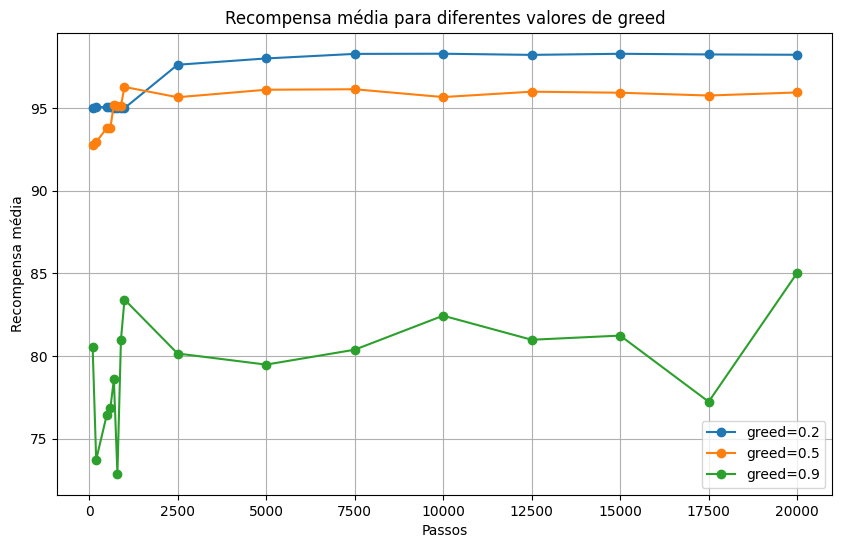

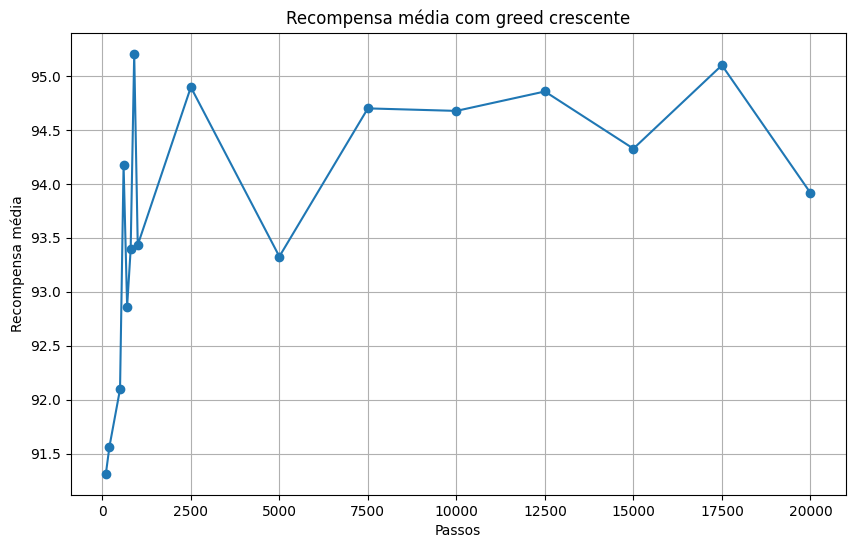

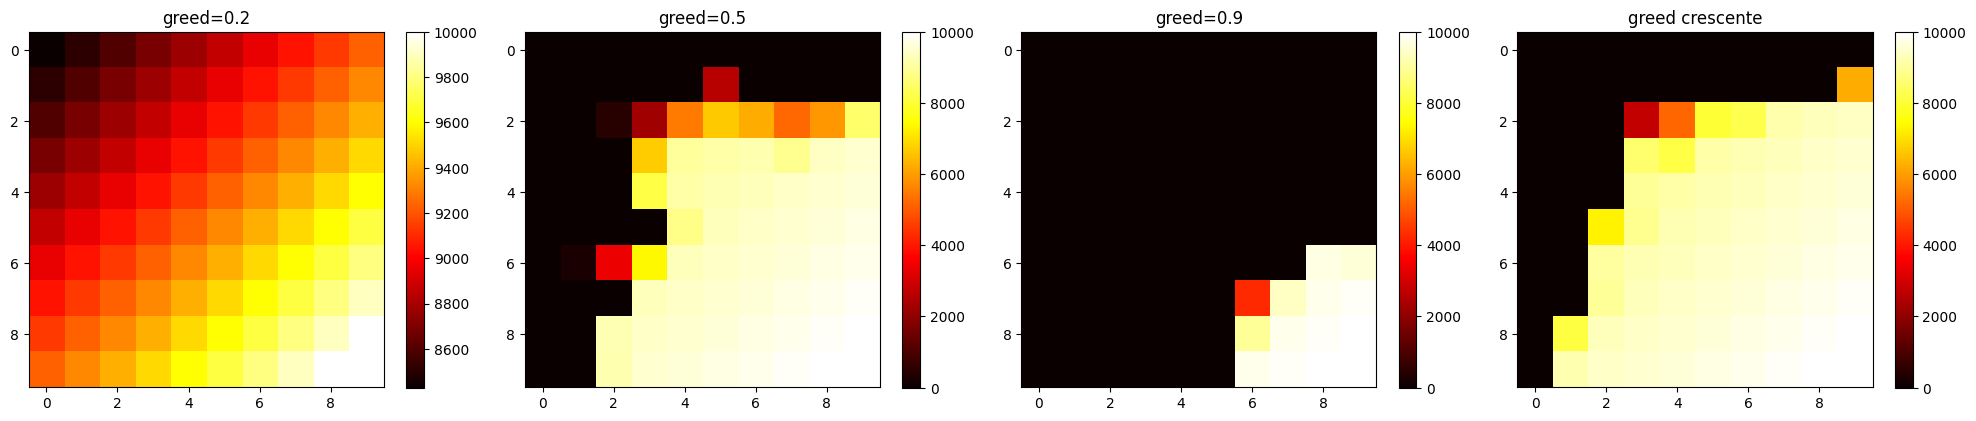

In [116]:
# ---------------------------------------
# Hiperparâmetros
# ---------------------------------------
alpha = 0.7
gamma = 0.99

test_steps = [100, 200, 500, 600, 700, 800, 900, 1000,
              2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]

greed_values = [0.2, 0.5, 0.9]

# ---------------------------------------
# Funções auxiliares
# ---------------------------------------

def choose_action_epsilon_greedy(state, Q, greed):
    if random.random() < greed:
        max_Q = np.max(Q[state, :])
        best_indices = np.where(Q[state, :] == max_Q)[0]
        action_index = random.choice(best_indices)
    else:
        action_index = random.randint(0, NUM_ACTIONS - 1)
    return actions_list[action_index], action_index

def run_test_mixture(Q, steps=1000):
    state = 1
    total_reward = 0
    for _ in range(steps):
        max_Q = np.max(Q[state, :])
        best_indices = np.where(Q[state, :] == max_Q)[0]
        action_index = random.choice(best_indices)
        action = actions_list[action_index]
        next_state = transition(state, action)
        total_reward += reward(next_state)
        state = next_state
    return total_reward / steps

def choose_action_growing_greed(state, Q, step, max_steps=20000, start_greed=0.3):
    greed = start_greed + (1 - start_greed) * (step / max_steps)
    greed = min(greed, 1.0)
    return choose_action_epsilon_greedy(state, Q, greed)

# ---------------------------------------
# POLÍTICAS (estratégias de acção)
# ---------------------------------------

def make_fixed_greed_policy(g):
    def policy(state, Q, step):
        return choose_action_epsilon_greedy(state, Q, g)
    return policy

def growing_greed_policy(state, Q, step):
    return choose_action_growing_greed(state, Q, step)

# ---------------------------------------
# Função principal: treinar agente
# ---------------------------------------

def train_agent(policy_function):
    Q = np.zeros((NUM_STATES + 1, NUM_ACTIONS))
    rewards_log = {step: [] for step in test_steps}
    state = 1
    for exp in range(EPISODES):
        for step in range(1, 20001):
            action, action_index = policy_function(state, Q, step)
            next_state = transition(state, action)
            update_Q(state, action_index, next_state, Q, alpha, gamma)
            state = next_state

            if step in test_steps:
                avg_reward = run_test_mixture(Q, steps=MAX_STEPS)
                rewards_log[step].append(avg_reward)

    return Q, rewards_log

# ---------------------------------------
# Executar treinos
# ---------------------------------------

results = {}

for g in greed_values:
    policy = make_fixed_greed_policy(g)
    Q_final, rewards = train_agent(policy)
    results[f"greed_{g}"] = (Q_final, rewards)

Q_final_growing, rewards_growing = train_agent(growing_greed_policy)
results["greed_growing"] = (Q_final_growing, rewards_growing)

# ---------------------------------------
# Gráfico: recompensas por greed fixo
# ---------------------------------------

plt.figure(figsize=(10, 6))
for g in greed_values:
    _, rewards = results[f"greed_{g}"]
    avg_rewards = [np.mean(rewards[s]) for s in test_steps]
    plt.plot(test_steps, avg_rewards, marker='o', label=f"greed={g}")

plt.xlabel("Passos")
plt.ylabel("Recompensa média")
plt.title("Recompensa média para diferentes valores de greed")
plt.grid(True)
plt.legend()
plt.show()

# ---------------------------------------
# Gráfico: greed crescente
# ---------------------------------------

_, rewards = results["greed_growing"]
avg_rewards = [np.mean(rewards[s]) for s in test_steps]

plt.figure(figsize=(10, 6))
plt.plot(test_steps, avg_rewards, marker='o')
plt.xlabel("Passos")
plt.ylabel("Recompensa média")
plt.title("Recompensa média com greed crescente")
plt.grid(True)
plt.show()

# ---------------------------------------
# Mapas de calor dos valores dos estados
# ---------------------------------------

plt.figure(figsize=(20, 4))

# Mapas para greed fixo
for i, g in enumerate(greed_values, start=1):
    Q_final, _ = results[f"greed_{g}"]
    state_values = np.max(Q_final[1:, :], axis=1).reshape((10, 10))

    plt.subplot(1, len(greed_values) + 1, i)
    plt.imshow(state_values, cmap='hot', interpolation='nearest')
    plt.title(f"greed={g}")
    plt.colorbar()

# Mapa para greed crescente
Q_final, _ = results["greed_growing"]
state_values_growing = np.max(Q_final[1:, :], axis=1).reshape((10, 10))

plt.subplot(1, len(greed_values) + 1, len(greed_values) + 1)
plt.imshow(state_values_growing, cmap='hot', interpolation='nearest')
plt.title("greed crescente")
plt.colorbar()

plt.tight_layout()
plt.show()


Pelos heatmaps podemos ver que quanto menor o greed, mais o algoritmo se aproxima do random walk. Por outro lado, quanto maior o greed, menor será o resultado final.

## Exercicio 4
Altere a simulação para incluir paredes (como na Figura 4) e que bater numa parede dê uma pequena recompensa de penalização (-0,1).

Média do tempo de execução: 0.32s, Desvio padrão: 0.15s


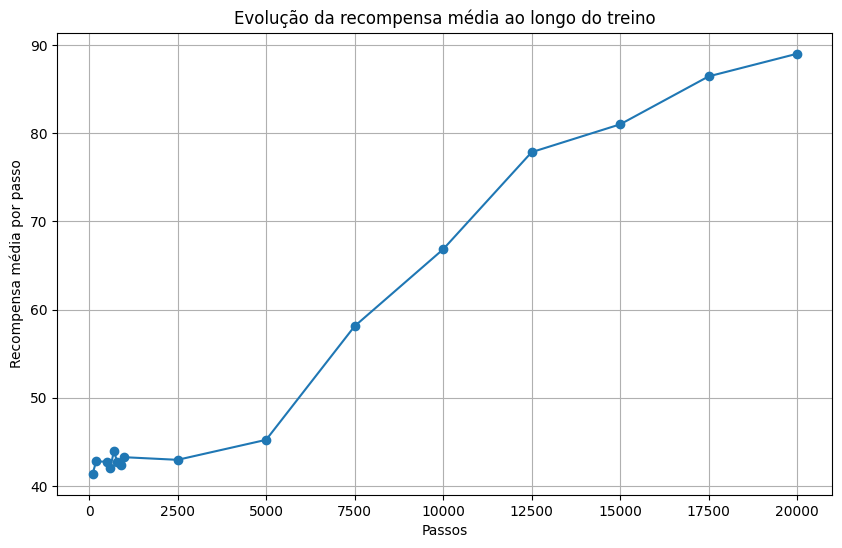

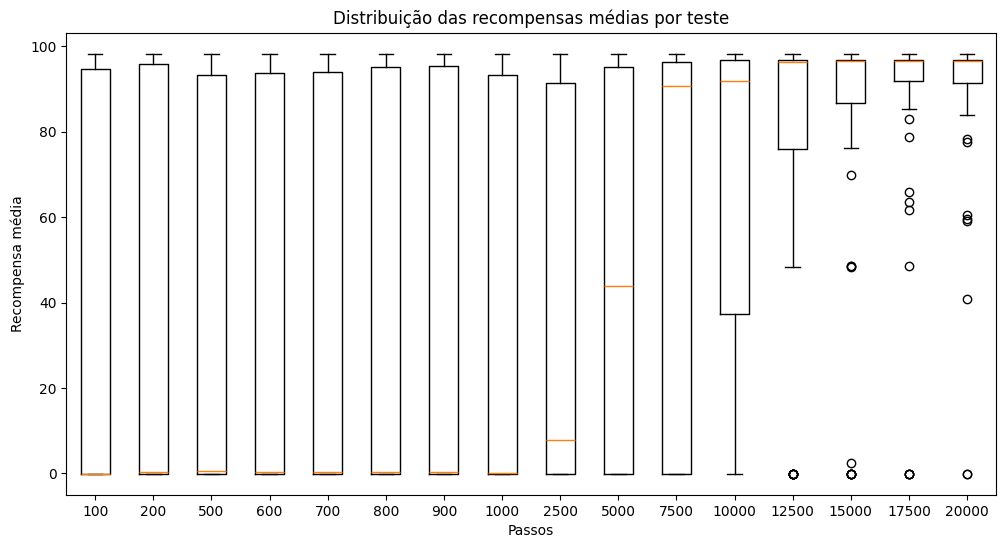

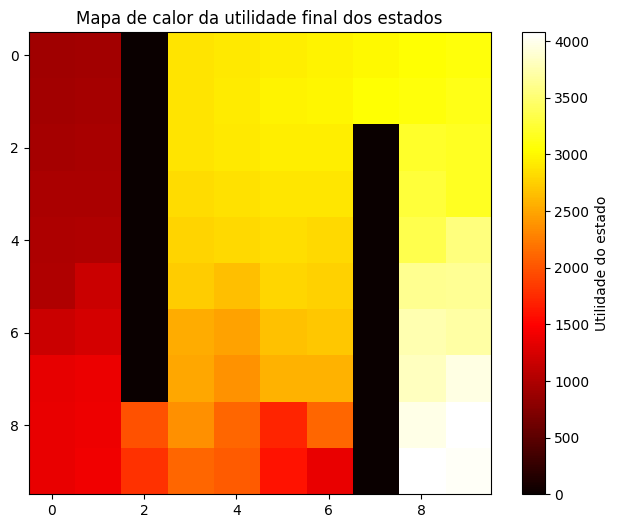

In [117]:
# Cada par (linha, coluna) é uma parede
walls = {(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2),(6, 2),(7, 2),
         (2, 7), (3, 7), (4, 7), (5, 7),(6, 7), (7, 7),(8, 7),(9, 7)
         }  

# funcao de transição mas com as paredes incluidas
def transition_walls(state, action):
    deltas = {"up": (-1, 0), "down": (1, 0), "left": (0, -1), "right": (0, 1)}
    row, col = state_to_coords(state)
    delta_row, delta_col = deltas[action]
    new_row, new_col = row + delta_row, col + delta_col
    if 0 <= new_row < ROWS and 0 <= new_col < COLS and (new_row,new_col) not in walls:
        return coords_to_state(new_row, new_col)
    else:
        return state

# Função de recompensa modificada
def reward_walls(state, previous_state=None):
    """r(s) ou penalização se bateu numa parede"""
    if state == 100:
        return 100
        
    elif previous_state is not None and state == previous_state:
        return -0.1  # penalização por bater numa parede ou borda
    else:
        return 0
    
 #função igual à função do ex2 mas com as funções com walls
def run_test_randomWalk_walls(Q, steps=MAX_STEPS):
    """Executa 1000 passos com a política atual e devolve a recompensa média por passo"""
    state = 1  # estado inicial 
    total_reward = 0
    for _ in range(steps):
        action = best_action(state, Q) 
        next_state = transition_walls(state, action)
        total_reward += reward_walls(next_state, state)
        state = next_state
    return total_reward / steps

random.seed(SEED)

# treino
for exp in range(EPISODES):
    #print(f"Experiência {exp+1}/{EPISODES}")
    
    # Inicializa Q para cada experiência
    Q = np.zeros((NUM_STATES + 1, NUM_ACTIONS))
    
    state = 1  # estado inicial 
    start_time = time.time()


    for step in range(1,20001):
        action_index = random.randint(0, NUM_ACTIONS-1)  # escolha aleatória
        action = actions_list[action_index]
        next_state = transition_walls(state, action)
        
        # Atualiza Q
        update_Q(state, action_index, next_state, Q, alpha, gamma)
        
        state = next_state
        
        # Testes nos passos definidos
        if step in test_steps:
            avg_reward = run_test_randomWalk_walls(Q, steps=1000)
            all_rewards[step].append(avg_reward)
            state_values = np.max(Q[1:, :], axis=1).reshape((10,10))
    
    elapsed_time = time.time() - start_time
    all_times.append(elapsed_time)

# Calcula média e desvio padrão dos tempos
mean_time = np.mean(all_times)
std_time = np.std(all_times)
print(f"Média do tempo de execução: {mean_time:.2f}s, Desvio padrão: {std_time:.2f}s")

# Gráfico de recompensa média vs passos
avg_rewards_over_exp = [np.mean(all_rewards[step]) for step in test_steps]

plt.figure(figsize=(10,6))
plt.plot(test_steps, avg_rewards_over_exp, marker='o')
plt.xlabel("Passos")
plt.ylabel("Recompensa média por passo")
plt.title("Evolução da recompensa média ao longo do treino")
plt.grid(True)
plt.show()

# Diagramas de caixa
plt.figure(figsize=(12,6))
plt.boxplot([all_rewards[step] for step in test_steps], tick_labels=test_steps)
plt.xlabel("Passos")
plt.ylabel("Recompensa média")
plt.title("Distribuição das recompensas médias por teste")
plt.show()

# Mapa de calor da utilidade final dos estados
plt.figure(figsize=(8,6))
# Sendo o ambiente é uma grelha 10x10
state_values = np.max(Q[1:, :], axis=1).reshape((10,10))
plt.imshow(state_values, cmap='hot', interpolation='nearest')
plt.colorbar(label="Utilidade do estado")
plt.title("Mapa de calor da utilidade final dos estados")
plt.show()

Comparando este heatmap com o heatmap do random walk sem paredes é possivel ver que a matriz Q é diferente, uma vez que foram adicionados estados em que a matriz Q é sempre 0.

Média do tempo de execução: 0.47s, Desvio padrão: 0.07s


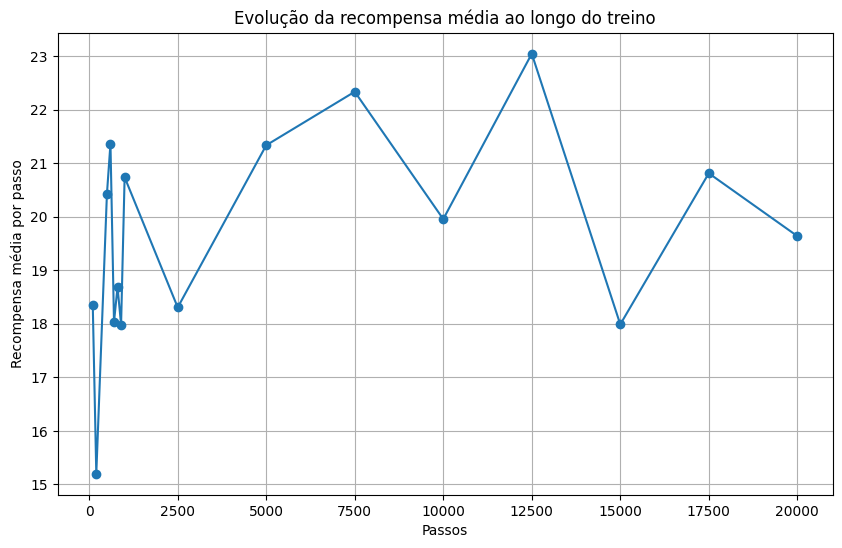

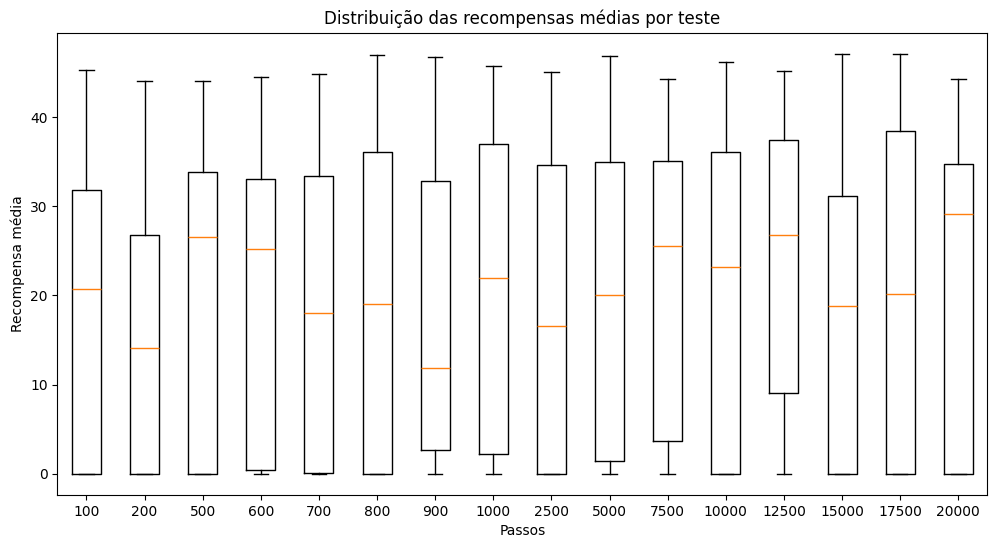

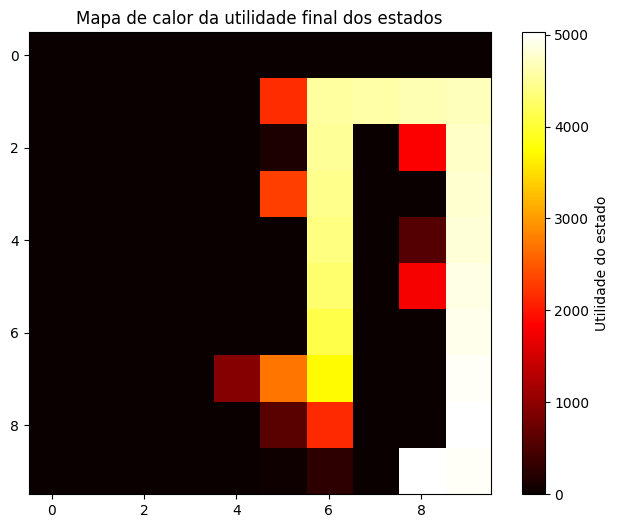

In [118]:

alpha = 0.7    # taxa de aprendizagem
gamma = 0.99   # fator de desconto

# Pontos onde vamos testar a recompensa média
test_steps = [100, 200, 500, 600, 700, 800, 900, 1000,
              2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]

all_rewards = {step: [] for step in test_steps}
all_times = []


def run_test_greedy_walls(Q, steps):
    """Executa 1000 passos com a política atual e devolve a recompensa média por passo"""
    state = 1  # estado inicial
    total_reward = 0
    for _ in range(steps):
        action_index = best_action_random_tie(state, Q)
        action = actions_list[action_index]
        next_state = transition_walls(state, action)
        total_reward += reward_walls(next_state)
        state = next_state
    return total_reward / steps

Q = np.zeros((NUM_STATES + 1, NUM_ACTIONS))  # +1 porque os estados vão de 1 a 100

random.seed(10)

for exp in range(EPISODES):
    
    state = 1  # estado inicial 
    start_time = time.time()
    
    for step in range(1,20001):
        action_index = best_action_random_tie(state, Q)  # escolha aleatória
        action = actions_list[action_index]

        next_state = transition_walls(state, action)
        
        # Atualiza Q
        update_Q(state, action_index, next_state, Q, alpha, gamma)
        
        state = next_state
        
        # Testes nos passos definidos
        if step in test_steps:
            avg_reward = run_test_greedy_walls(Q, steps=MAX_STEPS)
            all_rewards[step].append(avg_reward)
            state_values = np.max(Q[1:, :], axis=1).reshape((10,10))
    
    elapsed_time = time.time() - start_time
    all_times.append(elapsed_time)

# Calcula média e desvio padrão dos tempos
mean_time = np.mean(all_times)
std_time = np.std(all_times)
print(f"Média do tempo de execução: {mean_time:.2f}s, Desvio padrão: {std_time:.2f}s")

# Gráfico de recompensa média vs passos
avg_rewards_over_exp = [np.mean(all_rewards[step]) for step in test_steps]

plt.figure(figsize=(10,6))
plt.plot(test_steps, avg_rewards_over_exp, marker='o')
plt.xlabel("Passos")
plt.ylabel("Recompensa média por passo")
plt.title("Evolução da recompensa média ao longo do treino")
plt.grid(True)
plt.show()

# Diagramas de caixa
plt.figure(figsize=(12,6))
plt.boxplot([all_rewards[step] for step in test_steps], tick_labels=test_steps)
plt.xlabel("Passos")
plt.ylabel("Recompensa média")
plt.title("Distribuição das recompensas médias por teste")
plt.show()

# Mapa de calor da utilidade final dos estados
plt.figure(figsize=(8,6))
# Sendo o ambiente é uma grelha 10x10
state_values = np.max(Q[1:, :], axis=1).reshape((10,10))
plt.imshow(state_values, cmap='hot', interpolation='nearest')
plt.colorbar(label="Utilidade do estado")
plt.title("Mapa de calor da utilidade final dos estados")
plt.show()

Comparando este heatmap com o heatmap do Q-learning do exercicio 2 é possivel ver que os dois mostram o caminho claro que o nosso robo percorreu. Sendo que este caminho é diferente por causa das paredes, à semelhança com o que foi dito no Random walk

## Exercicio 5
Imagine que a mesma ação não leva sempre o robot para o mesmo estado (sistema nãodeterminista). Com uma probabilidade de 5%, pode levar o robot a qualquer estado vizinho do estado atual. Como é que isso afeta o resultado?


Média do tempo de execução: 0.33s, Desvio padrão: 0.15s


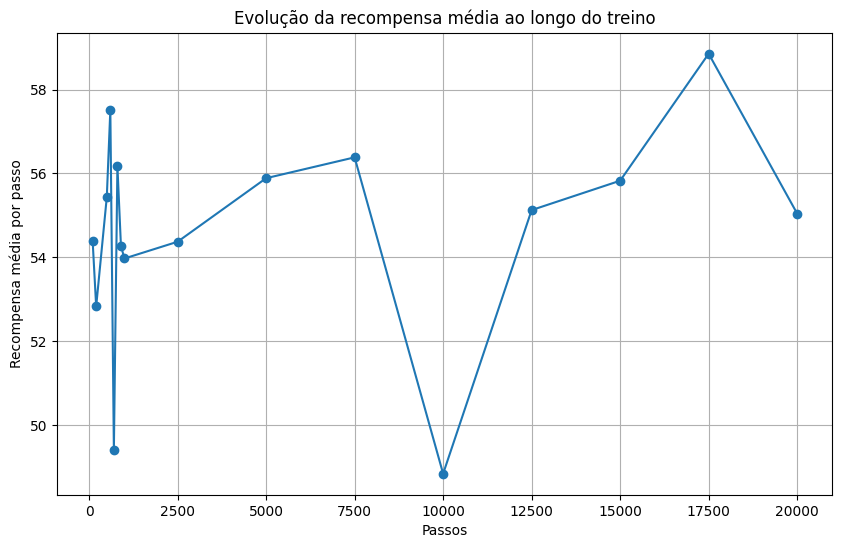

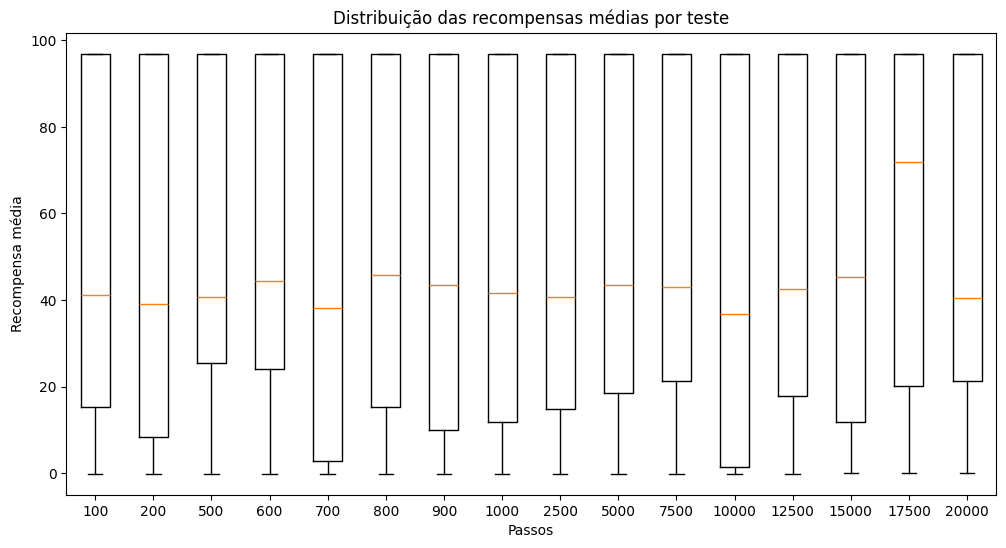

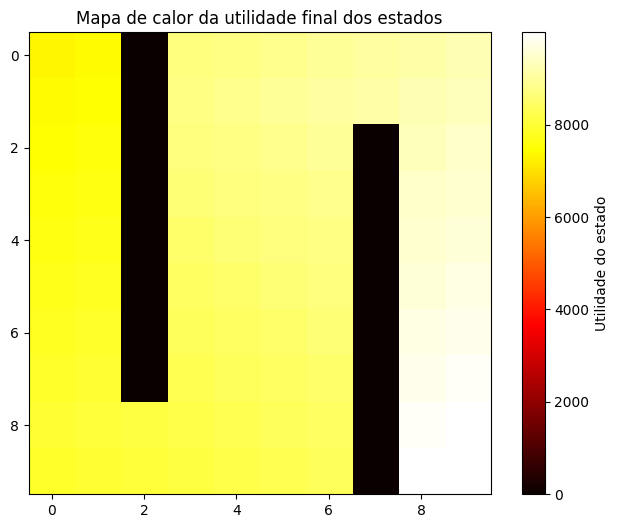

In [ ]:
"""Random Walk num Sistema não-determinista"""

#probabilidade do sistema não-determinista
prob = 0.05
random.seed(SEED)

# Inicializa Q para cada experiência
Q = np.zeros((NUM_STATES + 1, NUM_ACTIONS))

for exp in range(EPISODES):
    
    
    state = 1  # estado inicial 
    start_time = time.time()
    
    def run_test_randomWalk_walls(Q, steps=MAX_STEPS):
        """Executa 1000 passos com a política atual e devolve a recompensa média por passo"""
        state = 1  # estado inicial 
        total_reward = 0
        p = random.random()
        for _ in range(steps):
            if p >= prob:
                action = best_action(state, Q) #ver se nao é para usar o random_choice???
            else:
                action = choose_random_action()
            next_state = transition_walls(state, action)
            total_reward += reward_walls(next_state, state)
            state = next_state
        return total_reward / steps


    for step in range(1,20001):
        action_index = random.randint(0, NUM_ACTIONS-1)  # escolha aleatória
        action = actions_list[action_index]
        next_state = transition_walls(state, action)
        
        # Atualiza Q
        update_Q(state, action_index, next_state, Q, alpha, gamma)
        
        state = next_state
        
        # Testes nos passos definidos
        if step in test_steps:
            avg_reward = run_test_randomWalk_walls(Q, steps=1000)
            all_rewards[step].append(avg_reward)
            state_values = np.max(Q[1:, :], axis=1).reshape((10,10))
    
    elapsed_time = time.time() - start_time
    all_times.append(elapsed_time)

# Calcula média e desvio padrão dos tempos
mean_time = np.mean(all_times)
std_time = np.std(all_times)
print(f"Média do tempo de execução: {mean_time:.2f}s, Desvio padrão: {std_time:.2f}s")

# Gráfico de recompensa média vs passos
avg_rewards_over_exp = [np.mean(all_rewards[step]) for step in test_steps]

plt.figure(figsize=(10,6))
plt.plot(test_steps, avg_rewards_over_exp, marker='o')
plt.xlabel("Passos")
plt.ylabel("Recompensa média por passo")
plt.title("Evolução da recompensa média ao longo do treino")
plt.grid(True)
plt.show()

# Diagramas de caixa
plt.figure(figsize=(12,6))
plt.boxplot([all_rewards[step] for step in test_steps], tick_labels=test_steps)
plt.xlabel("Passos")
plt.ylabel("Recompensa média")
plt.title("Distribuição das recompensas médias por teste")
plt.show()

# Mapa de calor da utilidade final dos estados
plt.figure(figsize=(8,6))
# Sendo o ambiente é uma grelha 10x10
state_values = np.max(Q[1:, :], axis=1).reshape((10,10))
plt.imshow(state_values, cmap='hot', interpolation='nearest')
plt.colorbar(label="Utilidade do estado")
plt.title("Mapa de calor da utilidade final dos estados")
plt.show()

Como podemos ver, o resultado do sistema não-determinista é muito diferente do random walk normal. Isto porque pelo heatmap podemos perceber que a matriz Q tem praticamente todos os estados com valores muito altos não sendo facil dizer qual a melhor ação a partir de um certo estado

## Exercicio 6

Para usar percepções contínuas como estados num algoritmo com tabela Q, é necessário transformar o vetor de distâncias às paredes numa representação discreta que possa servir de índice. Isso pode ser feito categorizando as distancias em: “curta”, “média”, “longa” "NA"(muito longe). O problema é que, em casos como o exercicio 4 e 5, em que existem paredes a meio do percurso, o robo pode não conseguir passar por esses pontos uma vez que está perto das paredes. Tambem pode acontecer o robo receber a mesma percepção apesar de estar em locais distintos que exigem comportamentos diferentes. Por exemplo, perto da coluna 2 o robo está perto das paredes das colunas 3 pela direita e tem de ir para baixo. Na coluna 7 acontece o mesmo mas aí o robo tem de ir para cima. isto cria conflitos nas perceções e ações.